![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [74]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!

In [75]:
# Loading the dataset 
netflix_df = pd.read_csv('netflix_data.csv')
print(netflix_df)

     show_id  ...             genre
0         s1  ...  International TV
1         s2  ...            Dramas
2         s3  ...     Horror Movies
3         s4  ...            Action
4         s5  ...            Dramas
...      ...  ...               ...
7782   s7783  ...            Dramas
7783   s7784  ...            Dramas
7784   s7785  ...     Documentaries
7785   s7786  ...  International TV
7786   s7787  ...     Documentaries

[7787 rows x 11 columns]


In [76]:
# The filtering of the tv shows
netflix_subset = netflix_df[netflix_df['type'] == 'Movie']
print(netflix_subset)

     show_id  ...          genre
1         s2  ...         Dramas
2         s3  ...  Horror Movies
3         s4  ...         Action
4         s5  ...         Dramas
6         s7  ...  Horror Movies
...      ...  ...            ...
7781   s7782  ...       Children
7782   s7783  ...         Dramas
7783   s7784  ...         Dramas
7784   s7785  ...  Documentaries
7786   s7787  ...  Documentaries

[5377 rows x 11 columns]


In [77]:
# Filtering only the important columns 

netflix_movies = netflix_subset.loc[:, ['title', 'country', 'genre', 'release_year', 'duration']]
print(netflix_movies)

                                        title  ... duration
1                                        7:19  ...       93
2                                       23:59  ...       78
3                                           9  ...       80
4                                          21  ...      123
6                                         122  ...       95
...                                       ...  ...      ...
7781                                     Zoom  ...       88
7782                                     Zozo  ...       99
7783                                   Zubaan  ...      111
7784                        Zulu Man in Japan  ...       44
7786  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS  ...       90

[5377 rows x 5 columns]


In [78]:
# Inspecting short movies, the ones with less than 60 mins.

short_movies = netflix_movies[netflix_movies['duration'] < 60]
print(short_movies)

                                                  title  ... duration
35                                            #Rucker50  ...       56
55                  100 Things to do Before High School  ...       44
67    13TH: A Conversation with Oprah Winfrey & Ava ...  ...       37
101                                   3 Seconds Divorce  ...       53
146                                      A 3 Minute Hug  ...       28
...                                                 ...  ...      ...
7679                    WWII: Report from the Aleutians  ...       45
7692  Ya no estoy aquí: Una conversación entre Guill...  ...       15
7718                     Yoo Byung Jae: Discomfort Zone  ...       54
7771                                               Zion  ...       12
7784                                  Zulu Man in Japan  ...       44

[420 rows x 5 columns]


In [79]:
# Inspecting what couyld be the common reason for the short movies 

short_movies.head(20) 

# Seems like most of the movies that have short duration tend to be documentries, for children, Stand-Up and uncategorized.

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


In [80]:
# Will assign colors to the 4 types of genres to plot them
# Children -> blue
# Documentaries -> red
# Stand-Up -> yellow
# Others -> brown

colors = []

for x in netflix_movies['genre']:
    
    if x == 'Children':
        colors.append('blue')
        
    elif x == 'Documentaries':
        colors.append('red')
        
    elif x == 'Stand-Up':
        colors.append('yellow')
    
    else:
        colors.append('brown')
        

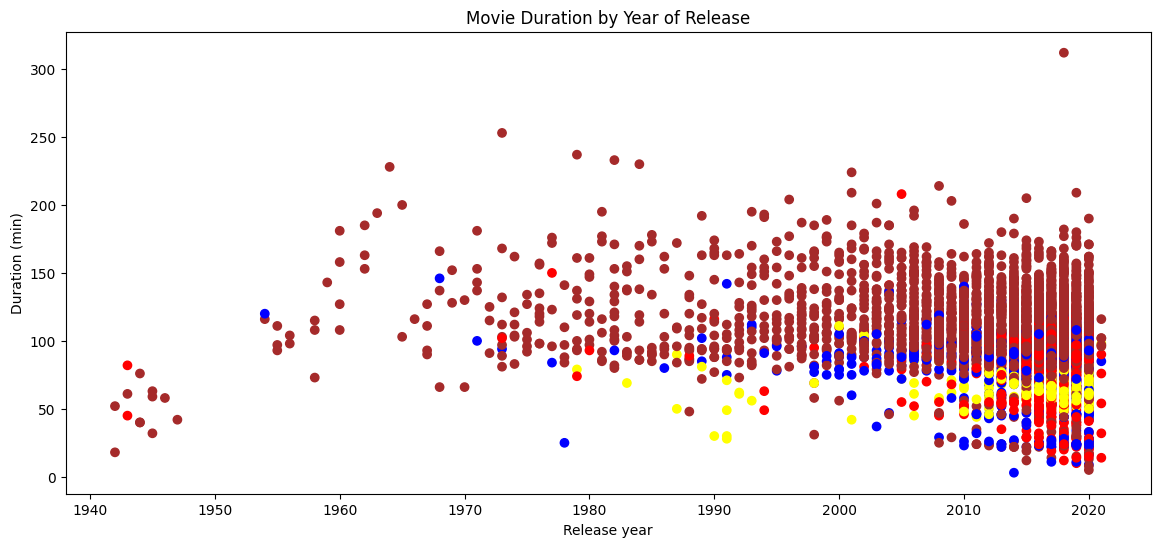

In [81]:
# Plotting the graph for the short duration movies based opn categories.
movie_duration = netflix_movies['duration']
release_years = netflix_movies['release_year']

fig = plt.figure(figsize=(14,6))
plt.scatter(release_years,movie_duration, color = colors)

plt.xlabel("Release year")
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')
plt.show()

# Children -> blue
# Documentaries -> red
# Stand-Up -> yellow
# Others -> brown

In [82]:
# Now the answer to if the duration of movies decreased over time.

answer = 'No'